<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%ED%95%B4%EC%84%9D%EC%97%AD%ED%95%99_019_Double_Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 해석역학
## <Elective Tracks 2024 Summer Programme>

# Double Pendulum

 <img src='https://drive.google.com/uc?export=download&id=12j-_yMftOPNpmkrb5qz3wAM-UTbGJwbE' width="200" height ="" />

In [ ]:
import sympy as sym
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [ ]:
sym.init_printing()

### Langrangian

In [ ]:
# 독립 변수
t = sym.Symbol("t")
t

t

In [ ]:
# 상수
m1, m2, g, L1, L2 = sym.symbols(r"m_1 m_2 g l_1 l_2", positive=True)
m1, m2, g, L1, L2

(m₁, m₂, g, l₁, l₂)

In [ ]:
# t의 함수
th1, th2 = sym.symbols("theta_1 theta_2", cls=sym.Function)
th1 = th1(t)
th2 = th2(t)
th1, th2

(θ₁(t), θ₂(t))

In [ ]:
# 직교 좌표 표현
x1 = L1 * sym.sin(th1)
y1 = -L1 * sym.cos(th1)
x2 = x1 + L2 * sym.sin(th2)
y2 = y1 - L2 * sym.cos(th2)
x1, y1, x2, y2

(l₁⋅sin(θ₁(t)), -l₁⋅cos(θ₁(t)), l₁⋅sin(θ₁(t)) + l₂⋅sin(θ₂(t)), -l₁⋅cos(θ₁(t)) - l₂⋅cos(θ₂(t)))

In [ ]:
# 직교 좌표 표현의 시간 미분
Dx1 = sym.diff(x1, t)
Dx2 = sym.diff(x2, t)
Dy1 = sym.diff(y1, t)
Dy2 = sym.diff(y2, t)

In [ ]:
# 에너지
T = (1/2) * m1 * (Dx1**2 + Dy1**2) + (1/2) * m2 * (Dx2**2 + Dy2**2)
V = m1 * g * y1 + m2 * g * y2

# 라그랑지안
L = T - V
L

                                                                    ⎛                           2  ↪
                                                                    ⎜  2    2        ⎛d        ⎞   ↪
g⋅l₁⋅m₁⋅cos(θ₁(t)) - g⋅m₂⋅(-l₁⋅cos(θ₁(t)) - l₂⋅cos(θ₂(t))) + 0.5⋅m₁⋅⎜l₁ ⋅sin (θ₁(t))⋅⎜──(θ₁(t))⎟   ↪
                                                                    ⎝                ⎝dt       ⎠   ↪

↪                              2⎞          ⎛                                                   2   ↪
↪     2    2        ⎛d        ⎞ ⎟          ⎜⎛              d                         d        ⎞    ↪
↪ + l₁ ⋅cos (θ₁(t))⋅⎜──(θ₁(t))⎟ ⎟ + 0.5⋅m₂⋅⎜⎜l₁⋅sin(θ₁(t))⋅──(θ₁(t)) + l₂⋅sin(θ₂(t))⋅──(θ₂(t))⎟  + ↪
↪                   ⎝dt       ⎠ ⎠          ⎝⎝              dt                        dt       ⎠    ↪

↪                                                     2⎞
↪  ⎛              d                         d        ⎞ ⎟
↪  ⎜l₁⋅cos(θ₁(t))⋅──(θ₁(t)) + l₂⋅cos(θ₂(t))⋅──(θ₂(t))⎟ ⎟
↪  ⎝              d

Euler-Lagrange equations:

$$ \frac{\partial L}{\partial \theta_1} - \frac{d}{dt} \frac{\partial L}{\partial \dot\theta_1} = 0 $$

$$ \frac{\partial L}{\partial \theta_2} - \frac{d}{dt} \frac{\partial L}{\partial \dot\theta_2} = 0 $$

In [ ]:
Dth1 = sym.diff(th1, t)
Dth2 = sym.diff(th2, t)
DDth1 = sym.diff(Dth1, t)
DDth2 = sym.diff(Dth2, t)

# 오일러-라그랑주 방정식
ELE1 = sym.diff(L, th1) - sym.diff( sym.diff(L, Dth1),t)
ELE2 = sym.diff(L, th2) - sym.diff( sym.diff(L, Dth2),t)

ELE1, ELE2

⎛                                                  ⎛                   2                           ↪
⎜                                                  ⎜    2    2        d                2    2      ↪
⎜-g⋅l₁⋅m₁⋅sin(θ₁(t)) - g⋅l₁⋅m₂⋅sin(θ₁(t)) - 0.5⋅m₁⋅⎜2⋅l₁ ⋅sin (θ₁(t))⋅───(θ₁(t)) + 2⋅l₁ ⋅cos (θ₁(t ↪
⎜                                                  ⎜                    2                          ↪
⎝                                                  ⎝                  dt                           ↪

↪     2        ⎞                                                                                   ↪
↪    d         ⎟          ⎛     ⎛              d                         d        ⎞            d   ↪
↪ ))⋅───(θ₁(t))⎟ + 0.5⋅m₂⋅⎜2⋅l₁⋅⎜l₁⋅sin(θ₁(t))⋅──(θ₁(t)) + l₂⋅sin(θ₂(t))⋅──(θ₂(t))⎟⋅cos(θ₁(t))⋅──( ↪
↪      2       ⎟          ⎝     ⎝              dt                        dt       ⎠            dt  ↪
↪    dt        ⎠                                                                          

In [ ]:
# th1, th2의 시간에 대한 이차 미분 식
DDsol = sym.trigsimp(sym.solve([ELE1, ELE2], [DDth1, DDth2], simplify=True))
DDsol

⎧                                                                                                  ↪
⎪                                                                                                  ↪
⎪ 2          2.0⋅g⋅m₁⋅sin(θ₁(t)) + g⋅m₂⋅sin(θ₁(t) - 2.0⋅θ₂(t)) + g⋅m₂⋅sin(θ₁(t)) + l₁⋅m₂⋅sin(2.0⋅( ↪
⎨d                                                                                                 ↪
⎪───(θ₁(t)): ───────────────────────────────────────────────────────────────────────────────────── ↪
⎪  2                                                                l₁⋅(-2.0⋅m₁ + m₂⋅cos(2.0⋅(θ₁(t ↪
⎩dt                                                                                                ↪

↪                            2                                           2                         ↪
↪                 ⎛d        ⎞                                 ⎛d        ⎞                          ↪
↪ θ₁(t) - θ₂(t)))⋅⎜──(θ₁(t))⎟  + 2.0⋅l₂⋅m₂⋅sin(θ₁(t) - θ₂(t))⋅⎜──(θ₂(t))⎟    2          -g

In [ ]:
DDsol[DDth1]

                                                                                                   ↪
                                                                                                   ↪
2.0⋅g⋅m₁⋅sin(θ₁(t)) + g⋅m₂⋅sin(θ₁(t) - 2.0⋅θ₂(t)) + g⋅m₂⋅sin(θ₁(t)) + l₁⋅m₂⋅sin(2.0⋅(θ₁(t) - θ₂(t) ↪
                                                                                                   ↪
────────────────────────────────────────────────────────────────────────────────────────────────── ↪
                                                       l₁⋅(-2.0⋅m₁ + m₂⋅cos(2.0⋅(θ₁(t) - θ₂(t))) - ↪

↪               2                                           2
↪    ⎛d        ⎞                                 ⎛d        ⎞ 
↪ ))⋅⎜──(θ₁(t))⎟  + 2.0⋅l₂⋅m₂⋅sin(θ₁(t) - θ₂(t))⋅⎜──(θ₂(t))⎟ 
↪    ⎝dt       ⎠                                 ⎝dt       ⎠ 
↪ ───────────────────────────────────────────────────────────
↪  m₂)                                                       

In [ ]:
DDsol[DDth2]

                                                                                                   ↪
                                                                                                   ↪
-g⋅m₁⋅sin(2.0⋅θ₁(t) - θ₂(t)) + g⋅m₁⋅sin(θ₂(t)) - g⋅m₂⋅sin(2.0⋅θ₁(t) - θ₂(t)) + g⋅m₂⋅sin(θ₂(t)) - 2 ↪
                                                                                                   ↪
────────────────────────────────────────────────────────────────────────────────────────────────── ↪
                                                                                          l₂⋅(-2.0 ↪

↪                                        2                                           2             ↪
↪                             ⎛d        ⎞                                 ⎛d        ⎞              ↪
↪ .0⋅l₁⋅m₁⋅sin(θ₁(t) - θ₂(t))⋅⎜──(θ₁(t))⎟  - 2.0⋅l₁⋅m₂⋅sin(θ₁(t) - θ₂(t))⋅⎜──(θ₁(t))⎟  - l₂⋅m₂⋅sin ↪
↪                             ⎝dt       ⎠                                 ⎝dt       ⎠     

### 수치 적분

In [ ]:
params = {m1:2, m2:1, g:9.8, L1:1, L2:1}

# th1, th2의 시간 이차 미분을 계산하는 함수 생성
DD1f = sym.lambdify([th1, th2, Dth1, Dth2], DDsol[DDth1].subs(params))
DD2f = sym.lambdify([th1, th2, Dth1, Dth2], DDsol[DDth2].subs(params))

In [ ]:
# 변화율 계산 함수
def f(t, S):
  th1, th2, Dth1, Dth2 = S

  DDth1 = DD1f(th1, th2, Dth1, Dth2)
  DDth2 = DD2f(th1, th2, Dth1, Dth2)

  return (Dth1, Dth2, DDth1, DDth2)

In [ ]:
# 서로 다른 파라미터에 대한 시뮬레이션을 진행하기 위해
# 시뮬레이션 과정을 클래스로 정의

class simDP:
  def __init__(self, th1, th2, Dth1, Dth2):
    self.th1 = th1
    self.th2 = th2
    self.Dth1 = Dth1
    self.Dth2 = Dth2

  def run(self):
    tf = 50
    N = 5000
    dt = tf / N
    teval = np.linspace(0, tf, N+1)
    S = (self.th1, self.th2, self.Dth1, self.Dth2)
    return solve_ivp(f, (0, tf), S, t_eval=teval, method="RK45", max_step=dt)

In [ ]:
pi = np.pi

# th2의 초기 값을 미세하게 다르게 설정한 2개의 시뮬레이션
sim1 = simDP(pi/2, pi/2, 0, 0)
sim2 = simDP(pi/2, pi/2 + 1e-7, 0, 0)

sol1 = sim1.run()
sol2 = sim2.run()

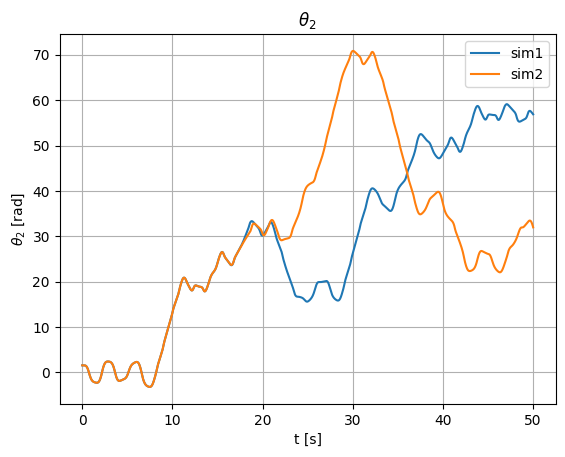

In [ ]:
# sim1, sim2의 시뮬레이션 결과(th2)
plt.title(r"$\theta_2$")
plt.grid()
plt.xlabel("t [s]")
plt.ylabel(r"$\theta_2$ [rad]")
plt.plot(sol1.t, sol1.y[1], label="sim1")
plt.plot(sol2.t, sol2.y[1], label="sim2")
plt.legend()

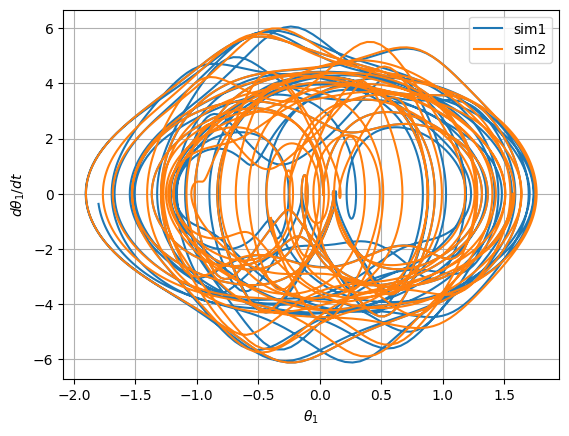

In [ ]:
# th1의 위상 도표
plt.grid()
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$d\theta_1/dt$")
plt.plot(sol1.y[0], sol1.y[2], label="sim1")
plt.plot(sol2.y[0], sol2.y[2], label="sim2")
plt.legend()

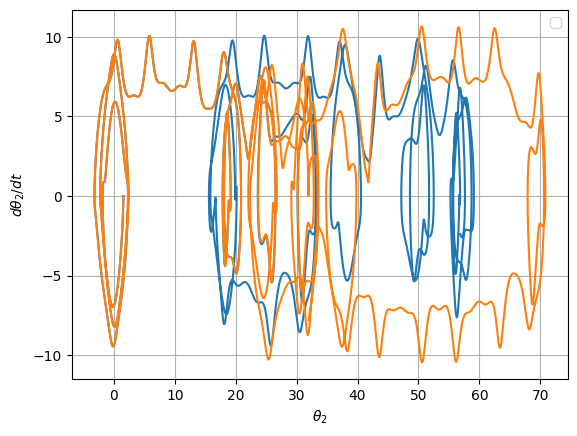

In [ ]:
#th2의 위상 도표
plt.grid()
plt.xlabel(r"$\theta_2$")
plt.ylabel(r"$d\theta_2/dt$")
plt.plot(sol1.y[1], sol1.y[3])
plt.plot(sol2.y[1], sol2.y[3])
plt.legend()

### 애니메이션 제작

In [ ]:
# 시뮬레이션 결과를 직교좌표로 변환하는 함수 생성
x1f = sym.lambdify([[th1, th2]], x1.subs(params))
y1f = sym.lambdify([[th1, th2]], y1.subs(params))
x2f = sym.lambdify([[th1, th2]], x2.subs(params))
y2f = sym.lambdify([[th1, th2]], y2.subs(params))

In [ ]:
import matplotlib.animation as anim
from matplotlib.animation import PillowWriter

In [ ]:
sr = 10 # Sampling Rate
ts     = sol1.t
s1th1s = sol1.y[0]
s1th2s = sol1.y[1]
s1ths = np.array([s1th1s, s1th2s]).T

s2th1s = sol2.y[0]
s2th2s = sol2.y[1]
s2ths = np.array([s2th1s, s2th2s]).T

# 시뮬레이션 결과를 직교좌표로 변환
s1x1s = x1f([s1th1s, s1th2s])
s1y1s = y1f([s1th1s, s1th2s])
s1x2s = x2f([s1th1s, s1th2s])
s1y2s = y2f([s1th1s, s1th2s])

s2x1s = x1f([s2th1s, s2th2s])
s2y1s = y1f([s2th1s, s2th2s])
s2x2s = x2f([s2th1s, s2th2s])
s2y2s = y2f([s2th1s, s2th2s])

In [ ]:
# 프레임 작성 함수

# 마커 크기(면적)를 추의 질량에 비례하도록 지정
ms = 20 * np.array([params[m1], params[m2]])

def frame(n):
  s1x1, s1y1 = s1x1s[::sr][n], s1y1s[::sr][n]
  s1x2, s1y2 = s1x2s[::sr][n], s1y2s[::sr][n]
  s2x1, s2y1 = s2x1s[::sr][n], s2y1s[::sr][n]
  s2x2, s2y2 = s2x2s[::sr][n], s2y2s[::sr][n]
  imin = max(0, n*sr - 100)

  ax.cla() # 화면 초기화

  # 화면 영역 지정
  ax.set_xlim(-2.5, 2.5)
  ax.set_ylim(-2.5, 0.5)

  # 제목 란에 시간 표시
  ax.set_title(f'{ts[::sr][n]:.2f} s')

  # sim1 결과
  # 막대
  ax.plot([0, s1x1, s1x2], [0, s1y1, s1y2], c='b')

  # 추
  ax.scatter([s1x1, s1x2], [s1y1, s1y2], \
             s = ms, \
             facecolors='white', edgecolor="b", zorder=2)

  # sim2 결과
  # 막대
  ax.plot([0, s2x1, s2x2], [0, s2y1, s2y2], c='r')

  # 추
  ax.scatter([s2x1, s2x2], [s2y1, s2y2], \
             s = ms, \
             facecolors='white', edgecolor="r", zorder=2)

  # 최근 자취
  ax.plot(s1x2s[imin:n*sr+1], s1y2s[imin:n*sr+1], c='b', alpha=0.3, zorder=1)
  ax.plot(s2x2s[imin:n*sr+1], s2y2s[imin:n*sr+1], c='r', alpha=0.3, zorder=1)

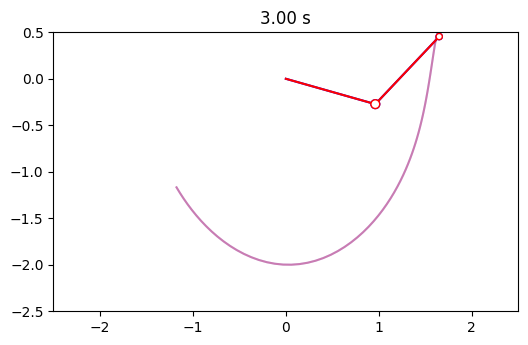

In [ ]:
# 한 프레임을 그려 확인
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.set_aspect('equal')
frame(30)
#plt.savefig("doublependulum.png")

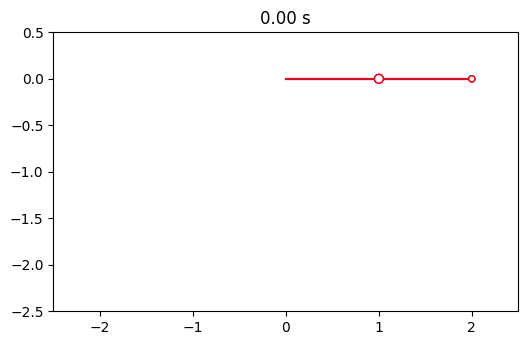

In [ ]:
# 애니메이션 정의
N = len(ts)//sr
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_aspect('equal')            # 가로-세로 비를 좌표 값에 비례하도록 지정
ani = anim.FuncAnimation(fig, frame, frames = N)

In [ ]:
#애니메이션을 파일로 출력(moving GIF)

fr = 100/sr
ani.save("DP.gif", writer='pillow', dpi=150, fps=fr)